## Analysis 

### Importing libraries

In [3]:
import matplotlib.pyplot as plt 
import pandas as pd 
import numpy as np 
import cmath 

### Generarting necessary string arrays

In [4]:
t = np.array([ 0.1 , 0.2 , 0.3 , 0.5 , 1 , 2 , 5])
s = np.full( len( t ) , 't = ')
colname = np.char.add( s , t.astype( str ) )

s = np.full( len(t) , '.csv' )
filename = np.full( len(t) , 'newfile' )
filename = np.char.add( filename , ((10*t).astype( int )).astype( str ) )
filename = np.char.add( filename , s )

### Impedance 

form the circuit simulation results, it is easy to deduce the impedance between the nodes 1 and 0, 
$$Z_{1,0} = \frac{1}{I(Vin)}$$
to find out the impedance between nodes 1 and 10, we can deduce the following relation from thevenin's circuit analysis, 
$$\frac{1}{Z_{1,0}} = \frac{1}{Z_{1,10} + \iota \omega L } + \frac{1}{\iota \omega L} + \iota \omega C_1 $$
for our circuit, $Z_{1,10} \equiv Z_{SHH}$.

In [5]:
grand_data = pd.DataFrame()
for i in range( 0 , len(t)): 
    data = pd.read_csv( filename[i] )
    temp =  data['z10r'] + 1j*data['z10i']
    f = 2* cmath.pi * data['f'].to_numpy()
    grand_data.insert( len( grand_data.columns ) , colname[i] , temp )
    grand_data.insert( len( grand_data.columns ) , colname[i] + ' abs' , np.absolute( temp ) )
    temp = np.reciprocal( temp ) - np.reciprocal(1j * f * 1e-5 ) + ( 1j * f * 1e-7 )
    z1n = np.reciprocal( temp ) - 1j*f*1e-5 
    grand_data.insert( len( grand_data.columns) , colname[i] + ' 1n' , z1n )
    grand_data.insert( len( grand_data.columns) , colname[i] + ' 1n abs' , np.absolute( z1n ) )
grand_data.insert( 0 , 'f' ,data['f'] )

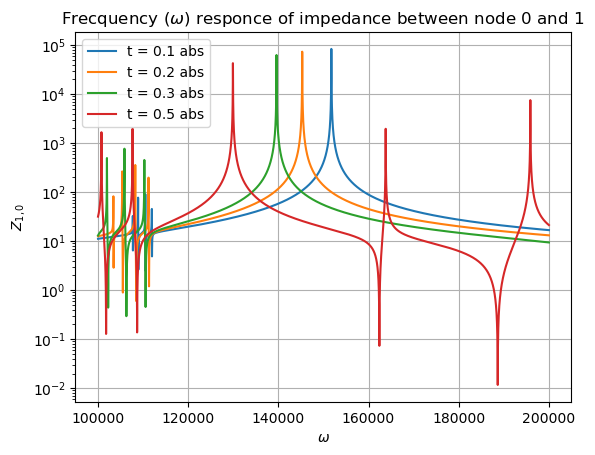

In [6]:
grand_data.plot( x = 'f' , y = np.char.add( colname , ' abs')[0:4] , kind = 'line')
plt.yscale( 'log')
plt.xlabel( r'$\omega$' )
plt.ylabel( r'$Z_{1,0}$') #  impedance between node 0 and 1
plt.title( r'Frecquency ($\omega$) responce of impedance between node 0 and 1 ')
plt.grid( True )
plt.show()

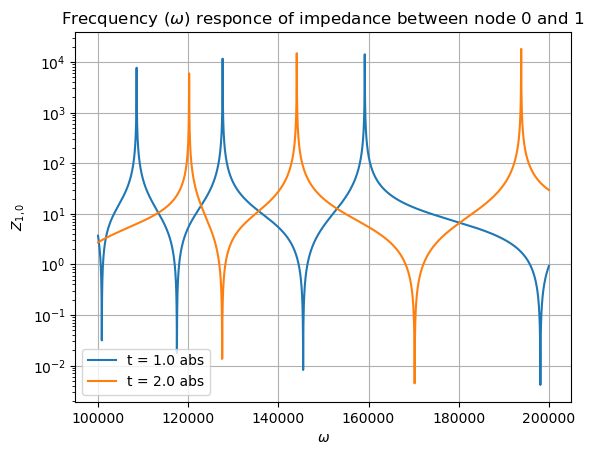

In [7]:
grand_data.plot( x = 'f' , y = np.char.add( colname , ' abs')[4:-1] , kind = 'line')
plt.yscale( 'log')
plt.xlabel( r'$\omega$' )
plt.ylabel( r'$Z_{1,0}$') #  impedance between node 0 and 1
plt.title( r'Frecquency ($\omega$) responce of impedance between node 0 and 1 ')
plt.grid( True )
plt.show()

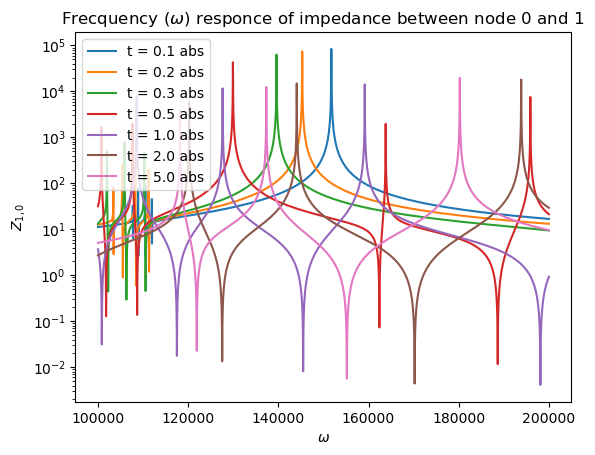

In [8]:
grand_data.plot( x = 'f' , y = np.char.add( colname , ' abs') , kind = 'line')
plt.yscale( 'log')
plt.xlabel( r'$\omega$' )
plt.ylabel( r'$Z_{1,0}$') #  impedance between node 0 and 1
plt.title( r'Frecquency ($\omega$) responce of impedance between node 0 and 1 ')
# plt.grid( True)
plt.show()

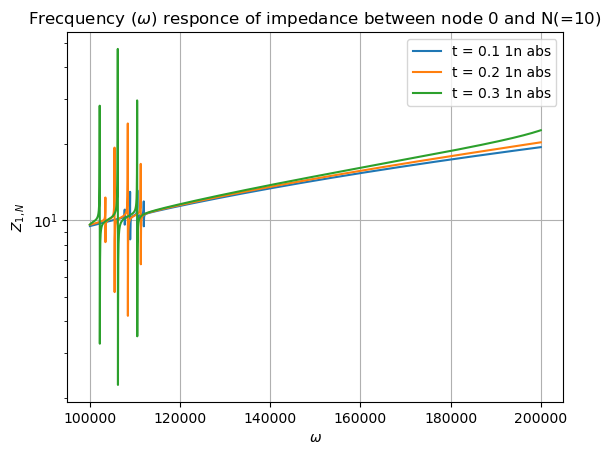

In [9]:
grand_data.plot( x = 'f' , y = np.char.add( colname , ' 1n abs')[0:3] , kind = 'line')
plt.yscale( 'log')
plt.xlabel( r'$\omega$' )
plt.ylabel( r'$Z_{1,N}$') #  impedance between node 0 and N = 10
plt.title( r'Frecquency ($\omega$) responce of impedance between node 0 and N(=10) ')
plt.grid( True )
plt.show()

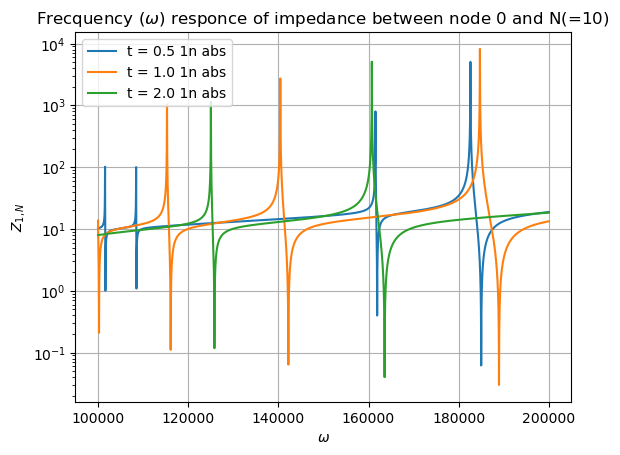

In [10]:
grand_data.plot( x = 'f' , y = np.char.add( colname , ' 1n abs')[3:-1] , kind = 'line')
plt.yscale( 'log')
plt.xlabel( r'$\omega$' )
plt.ylabel( r'$Z_{1,N}$') #  impedance between node 0 and N = 10
plt.title( r'Frecquency ($\omega$) responce of impedance between node 0 and N(=10) ')
plt.grid( True )
plt.show()